<a href="https://colab.research.google.com/github/raqueeb/TensorFlow2/blob/master/wikipedia_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import re
import os
import glob
import string

from gensim.models import Word2Vec
from gensim.models import FastText

In [42]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=12bopgleOmGGgaiEXmfCpxkCUzO6XDCyd' -O bn.zip

--2019-11-01 14:30:35--  https://docs.google.com/uc?export=download&id=12bopgleOmGGgaiEXmfCpxkCUzO6XDCyd
Resolving docs.google.com (docs.google.com)... 108.177.111.102, 108.177.111.113, 108.177.111.100, ...
Connecting to docs.google.com (docs.google.com)|108.177.111.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-08-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hn2nhtqfuoka7h0k3rgc1cta1b4ieclu/1572616800000/12171050669132932695/*/12bopgleOmGGgaiEXmfCpxkCUzO6XDCyd?e=download [following]
--2019-11-01 14:30:36--  https://doc-0s-08-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hn2nhtqfuoka7h0k3rgc1cta1b4ieclu/1572616800000/12171050669132932695/*/12bopgleOmGGgaiEXmfCpxkCUzO6XDCyd?e=download
Resolving doc-0s-08-docs.googleusercontent.com (doc-0s-08-docs.googleusercontent.com)... 172.217.212.132, 2607:f8b0:4001:c03::84
Connecting to doc-0s-08-docs.googleusercontent.com (doc-0s

In [43]:
!unzip bn.zip

Archive:  bn.zip
replace word2vec/bnwiki-texts-preprocessed.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: word2vec/bnwiki-texts-preprocessed.txt  
replace word2vec/wikipedia_embeddings.ipynb? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
preprocessed_text_file_path = './word2vec/bnwiki-texts-preprocessed.txt'

আমাদের এই টেক্সট ফাইলটা দেখে নিতে পারেন। প্রতিটা লাইনে একটা করে বাংলা বাক্য আছে। বাংলা উইকিপিডিয়া থেকে নেয়া। প্রি-প্রসেসিং করে নিয়েছি আগেই।

In [0]:
lines_from_file = []
with open(preprocessed_text_file_path, encoding='utf8') as text_file:
    for line in text_file:
        lines_from_file.append(line)

কতগুলো লাইন আছে এই ফাইলে?

In [64]:
len(lines_from_file)

1363435

আমাদের জেনসিম ওয়ার্ড২ভেক এবং ফাস্টটেক্সট শব্দের লিস্ট আশা করে একেকটা বাক্য/প্রতিটা লাইনে। যেমন, [["আমি", "এখন", "বইটি", "পরছি"],["বইটি", "অনেক", "ভাল"]]


In [0]:
tokenized_lines = []
for single_line in lines_from_file:
    tokenized_lines.append(single_line.split())

In [48]:
print(len(tokenized_lines))

1363435


In [49]:
print(tokenized_lines[0])

['বাংলা', 'ভাষা', 'বাংলা', 'ভাষা', 'বাংলা', 'ভাষা', 'বাঙলা', 'বাঙ্গলা', 'তথা', 'বাঙ্গালা', 'নামগুলোতেও', 'পরিচিত', 'একটি', 'ইন্দো', 'আর্য', 'ভাষা', 'যা', 'দক্ষিণ', 'এশিয়ার', 'বাঙালি', 'জাতির', 'প্রধান', 'কথ্য', 'ও', 'লেখ্য', 'ভাষা']


In [0]:
model = Word2Vec(tokenized_lines, size=200, window=5, min_count=10)

In [0]:
fasttext_model = FastText(tokenized_lines, size=200, window=5, min_count=10)

In [52]:
# শুরুতে ওয়ার্ড২ভেক ব্যবহার করছি, model এসেছে ওয়ার্ড২ভেক থেকে
print("ছেলে শব্দটার সবচেয়ে কাছাকাছি শব্দ কি?")
model.wv.most_similar('ছেলে', topn=5)

ছেলে শব্দটার সবচেয়ে কাছাকাছি শব্দ কি?


[('মেয়ে', 0.8677862882614136),
 ('বোন', 0.7884933948516846),
 ('ভাই', 0.7682802677154541),
 ('কন্যা', 0.7319516539573669),
 ('পুত্র', 0.7040947675704956)]

আমার পছন্দ ফাস্টটেক্সট, দেখি তাদের রেজাল্ট। 

In [53]:
print("ফাস্টটেক্সট উদাহরণ: ছেলে শব্দটার সবচেয়ে কাছাকাছি শব্দ কি?")
fasttext_model.wv.most_similar('ছেলে', topn=5)

ফাস্টটেক্সট উদাহরণ: ছেলে শব্দটার সবচেয়ে কাছাকাছি শব্দ কি?


[('ছেলেমেয়ে', 0.8510643243789673),
 ('ছেলেরাই', 0.7969586849212646),
 ('মেয়ে', 0.7832838892936707),
 ('ছেলেটা', 0.770179271697998),
 ('ছেলেবন্ধু', 0.7638169527053833)]

In [54]:
print("What is Father + Girl - Boy =?")
model.wv.most_similar(positive=['বাবা', 'মেয়ে'], negative=['ছেলে'], topn=5)

What is Father + Girl - Boy =?


[('মা', 0.7104865908622742),
 ('বান্ধবী', 0.6455312967300415),
 ('পিতা', 0.6444852948188782),
 ('দাদা', 0.6332948803901672),
 ('পিতামাতা', 0.6314936280250549)]

In [55]:
print(model.wv['বাংলাদেশ'])

[ 2.117011    1.331259   -0.8962955   1.3649317  -1.3177195  -0.6331799
 -0.10108567 -2.027288   -2.351334    1.2617953  -1.0116632  -1.1210635
 -0.03364351  0.67071486  0.16640812 -0.39225233 -1.7968122  -0.02062607
 -0.5234769  -2.3210163   2.4582293  -2.6090088  -3.0195858   0.11311233
  0.29813325  0.11876784  1.5325552   0.4930059   1.6276659  -0.24755377
  2.1636717  -0.69168794 -1.5501733  -0.03304282  1.3652518  -0.053016
 -1.5093915  -0.85248196  1.1748161  -1.7442951   1.0604897  -1.7562968
 -0.04759532 -0.59045213  0.3207666  -2.3566225  -0.8805366  -0.10970893
 -2.6733856  -0.7954859  -0.25234517 -3.462682    1.9827665  -2.0488381
  0.44675565  1.0839796  -0.3243911  -0.36120495 -1.7160774  -3.1907418
  1.4881688   0.98800755 -0.3731921  -0.22424792  0.7766865  -0.64494497
  3.3084538  -1.0232778  -2.2935338  -1.3153812  -2.7097259   1.8180741
  1.0274235  -0.3251607   1.754525    1.7478805   0.38397858  0.9557248
 -0.30038238  2.2420473  -1.9626849  -2.966227    1.59797   

In [56]:
print('এখানে কোন শব্দটা যাচ্ছে না বাকিদের সাথে?')
model.wv.doesnt_match("ঢাকা রাজশাহী রংপুর নজরুল".split())

এখানে কোন শব্দটা যাচ্ছে না বাকিদের সাথে?


'নজরুল'

In [57]:
print(model.wv.similarity('শিক্ষা', 'শিক্ষিত'))

0.41219878


In [58]:
semantically_similar_words = {words: [item[0] for item in model.wv.most_similar([words], topn=5)]
                  for words in ['বাংলা', 'মাতা', 'একুশে', 'ভাষা', 'আনন্দ', 'আকাশ']}

for k,v in semantically_similar_words.items():
    print(k+":"+str(v))

বাংলা:['অসমীয়া', 'বাংলার', 'সাঁওতালি', 'বাঙলা', 'হিন্দী']
মাতা:['পিতা', 'মা', 'জন্মনাম', 'দাদা', 'পিতামহ']
একুশে:['গ্রন্থমেলায়', 'গ্রন্থমেলা', 'মরণোত্তর', 'বইমেলায়', 'পদ্মভূষণ']
ভাষা:['ভাষার', 'ভাষাও', 'ভাষাকে', 'ভাষাটি', 'উপভাষা']
আনন্দ:['সুখ', 'হৃদয়', 'আরতি', 'ভালোবাসা', 'প্রদীপ']
আকাশ:['মেঘ', 'মেঘলা', 'পৃথিবী', 'সূর্য', 'আকাশের']


In [59]:
semantically_similar_words = {words: [item[0] for item in fasttext_model.wv.most_similar([words], topn=5)]
                  for words in ['বাংলা', 'মাতা', 'একুশে', 'ভাষা', 'আনন্দ', 'আকাশ']}

for k,v in semantically_similar_words.items():
    print(k+":"+str(v))

বাংলা:['বাংলা৷', 'বাংলাঃ', 'বাংলালিংক', 'জোড়বাংলা', 'শেরেবাংলা']
মাতা:['মাতাপিতা', 'মাতামহ', 'মাতামহী', 'মাতাও', 'পিতামাতা']
একুশে:['একুশ', 'একুশতম', 'অকাদেমী', 'একুশের', '২১শে']
ভাষা:['ভাষা৷', 'ভাষাও', 'কথ্যভাষা', 'ভাষাই', 'ভাষাভাষি']
আনন্দ:['আনন্দীবাঈ', 'আনন্দঘন', 'আনন্দমঠ', 'আনন্দলোক', 'আনন্দী']
আকাশ:['আকাশী', 'আকাশি', 'আকাশপথ', 'আকাশবাণী', 'আকাশপথে']


In [60]:
from sklearn.decomposition import PCA

all_similar_words = sum([[k] + v for k, v in semantically_similar_words.items()], [])

print(all_similar_words)
print(type(all_similar_words))
print(len(all_similar_words))

['বাংলা', 'বাংলা৷', 'বাংলাঃ', 'বাংলালিংক', 'জোড়বাংলা', 'শেরেবাংলা', 'মাতা', 'মাতাপিতা', 'মাতামহ', 'মাতামহী', 'মাতাও', 'পিতামাতা', 'একুশে', 'একুশ', 'একুশতম', 'অকাদেমী', 'একুশের', '২১শে', 'ভাষা', 'ভাষা৷', 'ভাষাও', 'কথ্যভাষা', 'ভাষাই', 'ভাষাভাষি', 'আনন্দ', 'আনন্দীবাঈ', 'আনন্দঘন', 'আনন্দমঠ', 'আনন্দলোক', 'আনন্দী', 'আকাশ', 'আকাশী', 'আকাশি', 'আকাশপথ', 'আকাশবাণী', 'আকাশপথে']
<class 'list'>
36


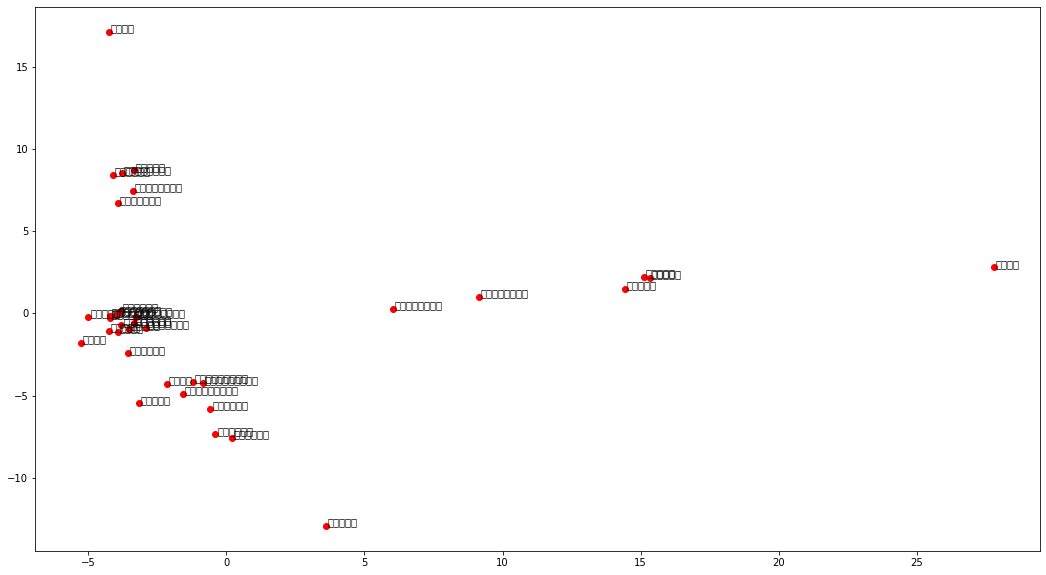

In [61]:
word_vectors = fasttext_model.wv[all_similar_words]

pca = PCA(n_components=2)

p_comps = pca.fit_transform(word_vectors)
word_names = all_similar_words

import matplotlib.pyplot as plt
plt.figure(figsize=(18, 10))
plt.scatter(p_comps[:, 0], p_comps[:, 1], c='red')

for word_names, x, y in zip(word_names, p_comps[:, 0], p_comps[:, 1]):
    plt.annotate(word_names, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points')